# Synthetic data: F1 Variation with sample size (at each mixture distribution)

In [ ]:
import operator
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
# 50-50 Accuracy
# a = [0.538, 0.589, 0.76, 0.823, 0.835, 0.83, 0.834, 0.84, 0.84, 0.84, 0.84]
# f1A = [0.537, 0.602, 0.754, 0.835, 0.846, 0.822, 0.819, 0.849, 0.85, 0.85, 0.849]
# f1B = [0.517, 0.564, 0.761, 0.811, 0.822, 0.836, 0.845, 0.83, 0.83, 0.83, 0.83]
# yerr_a = [0.03059412, 0.03139218, 0.03273618, 0.009, 0.005, 0, 0, 0, 0, 0, 0]

# 20-80 Accuracy
a = [0.619, 0.611, 0.767, 0.849, 0.9, 0.908, 0.91, 0.91, 0.919, 0.911, 0.91]
f1A = [0.728, 0.722, 0.845, 0.901, 0.937, 0.943, 0.948, 0.95, 0.95, 0.95, 0.95]
f1B = [0.348, 0.355, 0.527, 0.665, 0.725, 0.747, 0.75, 0.75, 0.756, 0.749, 0.742]
yerr_a = [0.05393515, 0.06064297, 0.03626123, 0.03718675, 0.00894427, 0.004, 0, 0, 0.003, 0.003, 0]

# 35-65 Accuracy
# a = [0.569, 0.622, 0.771, 0.847, 0.861, 0.869, 0.87, 0.869, 0.868, 0.87, 0.87]
# f1A = [0.647, 0.696, 0.827, 0.887, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.91]
# f1B = [0.43, 0.482, 0.654, 0.765, 0.779, 0.79, 0.798, 0.79, 0.789, 0.79, 0.79]
# yerr_a = [0.05579514, 0.04717513, 0.04657252, 0.01004988, 3.00E-03, 3.00E-03, 1.11E-16, 3.00E-03, 4.00E-03, 1.11E-16, 0]

x = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
plt.errorbar(x, a, yerr=yerr_a, linestyle='-', marker='o', color='steelblue', linewidth=2, markersize=5, label='Accuracy')
plt.errorbar(x, f1A, color='indianred', marker='o', linestyle='--', linewidth=2, markersize=5, label='F1 (Component 1)')
plt.errorbar(x, f1B, color='gray', marker='o', linestyle='--', linewidth=2, markersize=5, label='F1 (Component 2)')

# plt.xticks(x, ['100', '', '1000', '', '2000', '', '3000', '', '4000', '', '5000']) #, ["1K","2K", "5K", "10K"])
plt.xticks(x, ['100', '', '1K', '', '2K','', '3K','', '4K', '', '5K'], fontsize=15, rotation=0)
plt.xlabel('# samples', fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0.3, 1.0)
# matplotlib.rcParams['figure.figsize'] = 4, 4
plt.legend(loc='lower right', fontsize=14)
plt.tight_layout()
plt.savefig("newsep_2080")
# plt.savefig("newsep_5050")
# plt.savefig("newsep_3565")



# Synthetic data: MAE Variation with sample size (at each mixture distribution)

In [ ]:
import operator
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))

# 50-50 REC
# a = [0.37074579, 0.25019493, 0.17404112, 0.12540508, 0.10128784, 0.09072607, 0.07849716, 0.07209409, 0.06757301, 0.06547084, 0.06311453]
# b = [0.3949215, 0.24545285, 0.15568542, 0.10752383, 0.0933878, 0.08378726, 0.07491487, 0.06884225, 0.06643143, 0.06250859, 0.05921113]
# c = [0.06062301, 0.02945277, 0.02348285, 0.0133709, 0.00942099, 0.00148567, 0.00246742, 0.0028287, 0.00585847, 0.00692459, 0.0053351]
# yerr_a =[0.01559338, 0.01229178, 0.02463468, 0.00453263, 0.00251584, 0.00138803, 0.00236395, 0.00088981, 0.00041529, 0.00024523, 0.00024458]
# yerr_b = [0.01125925, 0.02007671, 0.02983395, 0.00334533, 0.00143176, 0.00083398, 0.0016343, 0.00044455, 0.00027153, 0.00010729, 0.00015296]
# yerr_c = [0.03342509, 0.03328124, 0.02947875, 0.00855437, 0.00197116, 0.00143394, 0.00122095, 0.00206881, 0.0015377, 0.00163429, 0.0023901]


# 20-80 REC
a = [0.38725599, 0.3076971, 0.24145477, 0.18859934, 0.15822143, 0.13764647, 0.12451263, 0.11706931, 0.10963067, 0.10454634, 0.09982226]
b = [0.3575607, 0.21797727, 0.14646918, 0.10859049, 0.08432286, 0.07281996, 0.0652692, 0.0592536, 0.05621151, 0.05286894, 0.05054079]
c =[0.25596714, 0.26309091, 0.15032923, 0.0824454, 0.02617578, 0.01671644, 0.00770426, 0.0021292, 0.00423743, 0.00638563, 0.00403792]
yerr_a= [0.01062006, 0.01490311, 0.02031074, 0.02706351, 0.00430746, 0.00326909, 0.00191078, 0.0013886, 0.00086065, 0.00088548, 0.00074231]
yerr_b= [0.01349547, 0.01082175, 0.02035687, 0.02351415, 0.00387934, 0.00231865, 0.0005127, 0.00030366, 0.00020685, 0.00022859, 0.00023127]
yerr_c=[0.04526637, 0.04038411, 0.08177962, 0.07846018, 0.01594264, 0.00552713, 0.00410155, 0.00133193, 0.00092739, 0.00084702, 0.00175291]


# 35-65 REC
# a= [0.38730426, 0.29005627, 0.20453674, 0.14857088, 0.12417421, 0.11013571, 0.09489955, 0.08761794, 0.08140841, 0.07595319, 0.07595319]
# b=[0.37721129, 0.22732048, 0.14089289, 0.10126032, 0.08339687, 0.07541356, 0.06815356, 0.06213098, 0.05815313, 0.05422041, 0.05422041]
# c= [0.14450361, 0.0927384, 0.03495736, 0.01304002, 0.00343374, 0.00311035, 0.00811258, 0.0015987, 0.00518599, 0.00695579, 0.00695579]
# yerr_a = [0.01531402, 0.01804096, 0.01839811, 0.00531005, 0.0023592, 0.00128358, 0.00104922, 0.00045345, 0.00102119, 0.00018216, 0.00018216]
# yerr_b = [0.02399086, 0.02056504, 0.01450604, 0.00294091, 0.00067655, 0.00071754, 0.00049323, 0.00038846, 0.00048446, 0.00019417, 0.00019417]
# yerr_c =[0.06133387, 0.05560605, 0.03764683, 0.00486948, 0.00239576, 0.00256609, 0.00168882, 0.0012212, 0.00238907, 0.00149278, 0.00149278]


x = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
plt.errorbar(x, a, yerr=yerr_a, linestyle='-', marker='o', color='steelblue', linewidth=2, markersize=5, label='MAE Edges (Component 1)')
plt.errorbar(x, b, yerr=yerr_b, color='indianred', marker='o', linestyle='-', linewidth=2, markersize=5, label='MAE Edges (Component 2)')
plt.errorbar(x, c, yerr=yerr_c, color='gray', marker='o', linestyle='--', linewidth=2, markersize=5, label='MAE Mixture Weights')

plt.xticks(x, ['100', '', '1K', '', '2K', '', '3K', '', '4K', '', '5K'], fontsize=15, rotation=0) #, ["1K","2K", "5K", "10K"])
plt.yticks(np.arange(0, 11, 1.0)*0.1)
plt.xlabel('# Samples', fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0.0, 0.4)
# plt.ylabel('Training time (min) \n', fontsize=15)
plt.legend(loc='upper right', fontsize=11)
plt.tight_layout()
plt.savefig("newrec_2080")
# plt.savefig("newrec_5050")
# plt.savefig("newrec_3565")


# Train Time

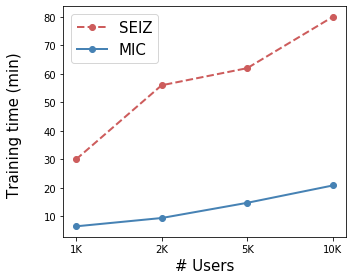

In [4]:
import operator
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))

y_mic = np.array([78, 113, 177, 250]) * 5/60
y_seiz = np.array([30, 56, 62, 80]) 
x = np.arange(4)  # 1K, 2K, 5K, 10K

plt.plot(x, y_seiz, color='indianred', marker='o', linestyle='--', linewidth=2, markersize=6, label='SEIZ')
plt.plot(x, y_mic, color='steelblue', marker='o', linestyle='-', linewidth=2, markersize=6, label='MIC')

plt.xticks(np.arange(4), ["1K", "2K", "5K", "10K"])
plt.xlabel('# Users', fontsize=15)
plt.ylabel('Training time (min) \n', fontsize=15)

plt.legend(loc='upper left', fontsize=15)
plt.tight_layout()
plt.savefig("newtwitter_ma_train_time.pdf", bbox_inches='tight')

# Intervention analysis (Edge intervention)

In [ ]:
import numpy as np
import matplotlib as mpl
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
import matplotlib.pyplot as plt
%matplotlib inline

n_groups = 5

means_oursgcn = [209.948] * n_groups
means_ours = [210.464, 208.872, 206.496, 206.836, 205.196]
means_linear = [193.844, 188.372, 169.164, 158.18, 105.728]

# means_oursgcn = [100.7, 100.7, 100.7, 100.7]  # [60.293800, 90.099400, 99.163800, 109.7248, 147.251000]
# means_ours = [91.08, 92.1, 87.78, 88.76] # [27.4858, 45.2956, 60.1078, 81.3892, 133.9648]
# means_linear = [89.52, 88.1, 85.32, 82.92] # [71.647600, 91.751800, 102.42420, 109.07100, 146.83020] # ('MAE:', 3.799) - check for singleton seeds
# means_logistic = [66.8156, 89.11, 98.02, 105.58, 160.19] # TODO (MAE: 2.691)
# means_random = [28.262400,47.580000,61.714000,74.498800,128.902000]

yerr_oursgcn = [19.792354483486797/1.5] * n_groups
yerr_ours = np.array([18.858014317525587, 19.53252712784498, 18.270686467672746, 20.974105558998218, 19.18096931857199])/1.5
yerr_linear = np.array([19.94280983211744, 19.5491589588913, 18.975170723869653, 12.94, 10.28659399412653])/1.5

# yerr_logistic = [0.627607, 0.501393, 0.458658, 0.453951, 0.3805]
# yerr_random = [0.968185,0.999080,0.985040,0.945063,0.655020]
 
# create plot
fig, ax = plt.subplots(figsize=(6,4))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 1.0 #  0.8
 
rects1 = plt.bar(index, means_oursgcn, bar_width,
yerr = yerr_oursgcn,
alpha=opacity,
color='steelblue',
label='Without Intervention')

rects2 = plt.bar(index + bar_width, means_ours, bar_width,
yerr = yerr_ours,
alpha=opacity,
color=colors["indianred"],
label='Random Intervention')
 
rects3 = plt.bar(index + 2*bar_width, means_linear, bar_width,
yerr = yerr_linear,
alpha=opacity,
color="gray",
label='MIC Intervention')
    
# rects4 = plt.bar(index + 3*bar_width, means_logistic, bar_width,
# yerr = yerr_logistic,
# alpha=opacity*0.5,
# color="gray",
# label='Constrained Logistic')

# rects5 = plt.bar(index + 4*bar_width, means_random, bar_width,
# yerr = yerr_random,
# alpha=opacity,
# color=colors["indianred"],
# label='Random')


plt.xlabel('K (# edges removed)', fontsize=15)
plt.ylabel('Expected influence $\sigma(s)$', fontsize=15)
# plt.title('Influence maximization', fontsize=15)
plt.xticks(index + bar_width, ('20', '50', '100', '250', '500'))
plt.legend(fontsize=12, loc='lower left')
 
plt.tight_layout()
# plt.savefig("newkwon_edge_inter.pdf", bbox_inches='tight')



# Intervention analysis (Node intervention)

In [ ]:
import numpy as np

# train_labels = np.loadtxt("mic_code/datasets/twitter_ma/labels.txt")
train_labels = np.loadtxt("mic_code/datasets/kwon/labels.txt")
def _read_cascades_file(cascades_filename):
    """
    Returns
    -------
    cascades : list(np.array((None, 2)))
        list of user_str, timestamp array (one array per cascade)
    """
    f = open(cascades_filename, "r")
    cascades = []
    for line in f.readlines():
        u_t = line.strip("\n").split(",")
        u = list(map(str, u_t[0::2]))  # string
        t = list(map(float, u_t[1::2]))  # float
        cascade = np.vstack([u, t]).transpose()
        cascades.append(cascade)
    f.close()
    return cascades
train_cascades = _read_cascades_file("mic_code/datasets/kwon/cascades.txt")
# train_cascades = _read_cascades_file("mic_code/datasets/twitter_ma/cascades.txt")
print(len(train_cascades), len(train_labels))

true_cascades = np.array(train_cascades)[train_labels==0]
fake_cascades = np.array(train_cascades)[train_labels == 1]
print(len(true_cascades), len(fake_cascades))

# --------------
u_f = {}
for cas in fake_cascades:
    for u in cas[:,0]:
        if u in u_f: u_f[u] += 1
        else: u_f[u] = 1
            
u_t = {}
for cas in true_cascades:
    for u in cas[:,0]:
        if u in u_t: u_t[u] += 1
        else: u_t[u] = 1
        
u_t_f = {}
u_t_f.update(u_t)
u_t_f.update(u_f)

# --------------

tot = 0.0
for fake in fake_cascades:
    tot += len(fake)
print(tot)
print(tot/len(fake_cascades))
    
# 1021 (avg size of fake cascades without intervention)
# 905, 707, 179 (20, 50, 10)

list_fake = [55694188, 42263843, 51406303, 1613744, 55272135, 55696103, 20468010, 12062772, 6004772, 5207724, 40208, 7494749, 38900860, 29012168, 9212253, 42946550, 4049583, 7405545, 39357, 27293990, 47294657, 30727658, 47732168, 52159242, 38972039, 32836210, 62022, 53932076, 37484955, 40906901, 14847426, 62047, 48439353, 38529727, 10243414, 2804617, 39387177, 9120036, 47866123, 47489548, 7609193, 1787533, 608347, 55657315, 55670766, 6454601, 23513871, 47741058, 27826144, 44442353, 37186191, 34140481, 48117808, 61292, 12326364, 11228024, 9022728, 2023955, 38361523, 11751139, 9404788, 49724208, 47913663, 55994964, 4070292, 55773805, 29521463, 2272182, 55977561, 44304477, 8414359, 135577, 42149683, 16222285, 42185160, 99697, 55918251, 20936857, 20376303, 1665263, 19049121, 17166687, 12068845, 49578583, 46161035, 35163914, 53273423, 55814726, 44044092, 16996691, 70791, 756, 41086244, 42053198, 36351, 44620283, 29401914, 17822, 8137344, 41310301]
set_fake = set(list_fake[0:20])
tot = 0.0
for fake in fake_cascades:
    for i, f in enumerate(fake[:,0]):
        if int(f) in set_fake:
            # print("broken")
            break
    tot += i
    # break
print(tot)
print(tot/len(fake_cascades))

list_fake = [1751276, 40642400, 3089441, 43376598, 36020039, 2617568, 55778918, 55807571, 44097883, 5887002, 81419, 20669943, 2233, 14525664, 17822, 42460, 40002259, 47845816, 30812768, 24313765, 55870407, 23246779, 5515116, 20224270, 48317134, 10097798, 55875089, 27571772, 22572117, 25486749, 1799663, 55762954, 55976677, 73068, 1829550, 54861866, 37368977, 39470093, 5837040, 13468120, 6874742, 11400501, 3906745, 2723226, 20235544, 31441663, 46044235, 27344887, 22673672, 46383996, 17339739, 31328008, 88040, 5885871, 53932076, 55869547, 6680826, 55729750, 73076, 55431049, 22481177, 9464, 34457017, 5207724, 54877956, 19498012, 7, 40208, 8684187, 8017839, 20445938, 29012168, 21224591, 15643182, 2465273, 55741827, 38972039, 17716823, 42844183, 15275360, 44681162, 15685307, 23801369, 21383369, 24182643, 47757001, 25114298, 17906363, 16127469, 55718371, 27826144, 22468486, 39346177, 39046439, 12644262, 9458, 52340401, 55383382, 11209421, 1786837]
set_fake = set(list_fake[0:100])
tot = 0.0
for fake in fake_cascades:
    for i, f in enumerate(fake[:,0]):
        if int(f) in set_fake:
            # print("broken")
            break
    tot += i
    # break
print(tot)
print(tot/len(fake_cascades))

# Cascade Dynamics (Inferred edges test)

In [ ]:
import operator
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': '11',
          'figure.figsize': (4, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
import pickle, sys

# to_plot = False
to_plot = True
cascades_dict = pickle.load(open("../../main/pred_cas/fakeseeds_truediffma.pkl", "rb"))
saveimg_path = 'pred_cas_ma/fakeseeds_truediffma'

for pltno, (seedset, sims) in enumerate(cascades_dict.items()): # [-2:-1]):
    
    print(".............")
    print("Seedset:", seedset)
    
    list_actives = []
    maxlen = 0
    for cas in sims:
        u = cas[:, 0]
        t = cas[:, 1]
        time = -1
        actives = []
        for i in t:
            if i > time:
                time += 1
                actives.append(1)
            else:
                actives[time] += 1
        list_actives.append(actives)
        if len(actives) > maxlen:
            maxlen = len(actives)
    print("Maxlength of simulated cascade:", maxlen)
#     if maxlen < 50:
#         maxlen = 50
    if maxlen < 100:
        maxlen = 100
    expected_cascade = np.zeros((len(list_actives), maxlen))
    for i, act in enumerate(list_actives):
        expected_cascade[i] = np.array(act + [0]* (maxlen-len(act)))

    mean = np.mean(expected_cascade, 0)
    std = np.std(expected_cascade, 0)
    cum = 1.0* np.cumsum(mean)
    cumnorm = cum/np.max(cum)
    print("Final expected size of cascade:", np.max(cum))
    print("Max # tweets expected at any timestep:", np.max(mean))
    
    if to_plot:
        f = plt.figure()
        x_pts = np.arange(maxlen)

        ax1 = f.add_subplot(111)
        # line1 = ax1.bar(x_pts, mean, yerr=std, color='indianred', label="expected")
        line1 = ax1.bar(x_pts, mean, color='indianred', label="expected")
        ax1.fill_between(x_pts, mean-std, mean+std,  color='pink',alpha=0.8, hatch = '/')
        # ax1.set_xticks(np.arange(0, maxlen+1, 10))
        # ax1.set_ylim(0, 20)
        ax1.set_xticks(np.arange(0, maxlen+1, 20))
        ax1.set_ylim(0, 40)
        
        ax2 = f.add_subplot(111, sharex=ax1, frameon=False)
        line2 = ax2.fill_between(x_pts, cumnorm, color='steelblue', alpha=0.2, label="expected")
        # ax2.set_xticks(np.arange(0, maxlen+1, 10))
        ax2.set_xticks(np.arange(0, maxlen+1, 20))
        ax2.set_ylim(0, 1+0.05)
        ax2.yaxis.tick_right()

        plt.legend((line1, line2), ('Exp # Tweets', 'Cum. Freq.'), loc='upper left')
        plt.xlabel('Timesteps', fontsize=15)
        plt.tight_layout()
        if saveimg_path:
            plt.savefig('{}{}.png'.format(saveimg_path, pltno))


# ('Seedset:', '22225065')
# ('Maxlength of simulated cascade:', 13)
# ('Final expected size of cascade:', 2.4800000000000004)
# ('Max # tweets expected at any timestep:', 1.0)

# Influencers Analysis (User features and descriptors)

In [20]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from notebook_utils import *

# dict_=pd.read_pickle(open('/drive2/sungyong/data/fake_reviews/twitter/tweet_dict_ids.pkl','rb'))
fake_component = 1
output = "kwon_testing_resp_1"
# output = "tma-2"
data = "kwon"
output_dir = "../output/{}/".format(output)
edge_file = output_dir + 'learned_graph.tsv'
idx2u_file = output_dir + 'idx2u.txt'
selected_infl_file = output_dir + 'selected_influential_users.tsv'
data_dir = "../data/{}/".format(data)
cascades_file = data_dir + 'cascades.txt'
labels_file = data_dir + 'labels.txt'

df = pd.read_csv(edge_file, sep='\t')
idx2u = np.loadtxt(idx2u_file)
print('considered users in inference', len(idx2u))
train_cascades = read_cascades_file(cascades_file)
train_labels = np.loadtxt(labels_file)
print('num cascades', len(train_cascades), len(train_labels))
inf_df = pd.read_csv(selected_infl_file, sep='\t', header=0)
print('num selected infl', len(inf_df))

userfeat_file = '/meladyfs/newyork/krsharma/misc/kwon_dataset/sub_user_info_share.txt'
ufeat = pd.read_csv(userfeat_file, sep='\t', header=None) # followers, followees (friends), posts
ufeat.columns = ['userid', 'followers', 'friends/followees', 'posts']
print(ufeat.head())

"""
First: Engagement count in user filtering
"""
def eng_count():
    true_cascades = np.array(train_cascades)[train_labels==0]
    fake_cascades = np.array(train_cascades)[train_labels == 1]
    print('t/f', len(true_cascades), len(fake_cascades))

    u_t, u_f, sorted_t, sorted_f = get_engagement_counts(true_cascades, fake_cascades)
    print('u_t, u_f, tot', len(u_t), len(u_f), len(u_t) + len(u_f))
    sorted_users = np.concatenate([sorted_t, sorted_f], axis=0)
    # users with engagements greater than 5
    num_users_with_large_eng = len(sorted_users[sorted_users[:, 1] > 5])
    print('users large eng > 5', num_users_with_large_eng)
    num_users_with_large_eng = len(sorted_users[sorted_users[:, 1] > 10])
    print('users large eng > 10', num_users_with_large_eng)
    
    return u_t, u_f

u_t, u_f = eng_count()

"""
Second: Find features of influential users selected. # followers, # posts, description # eng_t # eng_f
"""
fake_infl = inf_df['selected_{}'.format(fake_component)].apply(lambda x: int(idx2u[x]))
true_infl = inf_df['selected_{}'.format(1-fake_component)].apply(lambda x: int(idx2u[x]))


# list_fake = [1161, 633, 1034, 685, 1681, 1629, 1309, 1922, 260, 377, 1203, 1182, 923, 1343, 631, 534, 1938, 646, 1073, 803, 930, 871, 14, 1240, 1223, 1286, 253, 1372, 538, 1671]
# fake_infl = [idx2u[f] for f in list_fake]
# true_infl = [idx2u[t] for t in list_true]

def extract_feats(infl, u_t, u_f):
    extracted_df = ufeat[ufeat['userid'].isin(infl)]
    extracted_df['u_t'] = extracted_df['userid'].apply(lambda x: u_t[x] if x in u_t else 0)
    extracted_df['u_f'] = extracted_df['userid'].apply(lambda x: u_f[x] if x in u_f else 0)
    extracted_df = extracted_df.set_index('userid').loc[infl]
    print(extracted_df.head(10))

    
print('\n\n-------> true infl feats\n')
extract_feats(true_infl, u_t, u_f)


print('\n\n-------> fake infl feats\n')
extract_feats(fake_infl, u_t, u_f)


# OLD KWON:
print('\n\nOld Kwon')

fake_infl = [42921853, 45696250, 9428477, 18485804, 37484955, 15538468, 34544545, 80876, 54879, 33361052, 37232745, 33603546, 1680247, 40864273, 134, 20164964, 29144327, 1883240, 47924370, 24916432, 35560818, 15554302, 773, 5272341, 29507615, 29156372, 38769438, 34345266, 2233, 8627533, 14611855, 32269208, 49726906, 28193335, 8098832, 12200968, 55903340, 47588713, 31917878, 19707732, 46248155, 33910097, 55976845, 27047346, 47386549, 9910421, 22678269, 44147043, 35379119, 51841996, 20795579, 37955867, 1002, 46900340, 48467139, 55970765, 17866088, 20853985, 21684, 55972805, 17281580, 18797761, 47872293, 22601310, 7148912, 43816406, 103535, 30331073, 27958549, 17119043, 34686602, 30721844, 28131892, 12068845, 18035830, 27104465, 22978489, 47977103, 46730321, 43369375, 43756699, 12186498, 19444022, 61280, 41050967, 31441663, 42926119, 55991030, 10688944, 16358632, 23219078, 5297007, 2150040, 35332369, 5773920, 68059, 42401663, 27547127, 15491837, 4667953]
true_infl = [30122132, 9456, 1041957, 55931092, 52656642, 51298452, 2329550, 74679, 9761160, 42598690, 12987474, 1083172, 25480395, 24007123, 53616317, 6934529, 22041886, 25869801, 20510188, 37057701, 42946550, 23803578, 21417341, 31665361, 29264958, 16639123, 28117383, 5396879, 30971958, 23086420, 28776904, 80876, 40591, 49782598, 48911973, 10501473, 9022728, 11494548, 47350415, 55774980, 39515674, 42837, 17072, 49272331, 81419, 42760, 24058200, 10041, 30404702, 6365957, 11749083, 25672074, 14748530, 52263483, 166747, 45543326, 15315324, 20716299, 5903540, 34420488, 40075183, 23246755, 56017762, 43560260, 15191995, 33786128, 360451, 25200040, 16939, 23539100, 16759010, 56023202, 3420957, 9645533, 55935602, 41127254, 7414712, 54917, 52244910, 42976, 29156372, 24773084, 32106161, 35444685, 40176, 46945086, 54780470, 80877, 49755942, 19047950, 9656071, 38410, 11209421, 6481132, 49614, 35775165, 21719470, 22525981, 65561, 825]

print('\n\n-------> true infl feats\n')
extract_feats(true_infl, u_t, u_f)


print('\n\n-------> fake infl feats\n')
extract_feats(fake_infl, u_t, u_f)


print("\n\n")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
considered users in inference 1987
num cascades 111 111
num selected infl 30
     userid  followers  friends/followees  posts
0  10239185      14221                202   7134
1  21675457       6499                 87   2247
2  26670455    1198861                913   4460
3  51645922       9367                208   5621
4  54686586       5965                 21   3102
t/f 51 60
u_t, u_f, tot 76041 47869 123910
users large eng > 5 2930
users large eng > 10 1021


-------> true infl feats

          followers  friends/followees  posts  u_t  u_f
userid                                                 
14209566       7535               7287   5881    1    0
2407              0                  0   3728    5    0
12062772        108                 32   2277    0    1
55814726        137                 61    107    1    0
47913663        577                460   2442   16    0
39357           186        

/home/krsharma/miniconda3/envs/mic/lib/python3.7/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/krsharma/miniconda3/envs/mic/lib/python3.7/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
import pandas as pd
import pickle as pkl
dict_=pd.read_pickle('/meladyfs/newyork/krsharma/kdd_data/twitter-ma/tweet_dict_ids.pkl')

TypeError: 'dict_keys' object is not subscriptable

In [9]:
dict_[list(dict_.keys())[0]]

{'usr_fav_num': 0       257
 1         0
 2         1
 3      2425
 4      8560
        ... 
 517     338
 518       1
 519       0
 520       0
 521     190
 Name: usr_fav_num, Length: 522, dtype: int64,
 'uid': array([ 23659017,  16693051, 103060329,  11086752,  40908760,  36264361,
         25762022,   6017542,  22486433,  48219892,  56967720,  81978053,
         19430825, 123752501, 113721074,  70856943, 140236387,  20342990,
         22503300,  19069638,  23523010,  17915693,  14242376,  41921952,
         90014296,  15964841,  16868899,  22400438,  64298694,  29169796,
        133888210,    766658,  28363355,  46528326,  33444557,  35706221,
         14851304,  44215050,  18009912,  26331813,  68803674, 130207694,
         27408423,  16619999,  31138982,  34095040,  72154520,  23973051,
         18202628,  28609195,  27722097,  24392202,  46785255,  20945895,
        104170629,  26673807,  23285942,  19042030,  47353833,   8633872,
         14745264,  25692368,  97729875,  593934

# Influential users test

In [ ]:
import numpy as np

train_labels = np.loadtxt("mic_code/datasets/twitter_ma/labels.txt")
def _read_cascades_file(cascades_filename):
    """
    Returns
    -------
    cascades : list(np.array((None, 2)))
        list of user_str, timestamp array (one array per cascade)
    """
    f = open(cascades_filename, "r")
    cascades = []
    for line in f.readlines():
        u_t = line.strip("\n").split(",")
        u = list(map(str, u_t[0::2]))  # string
        t = list(map(float, u_t[1::2]))  # float
        cascade = np.vstack([u, t]).transpose()
        cascades.append(cascade)
    f.close()
    return cascades
train_cascades = _read_cascades_file("mic_code/datasets/twitter_ma/cascades.txt")
print(len(train_cascades), len(train_labels))

true_cascades = np.array(train_cascades)[train_labels==0]
fake_cascades = np.array(train_cascades)[train_labels == 1]
print(len(true_cascades), len(fake_cascades))

# ------------------------
# TRUE AND FAKE - distribution of engagement counts [Top 2K users]
import operator
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


u_t = {}
for cas in true_cascades:
    for u in cas[:,0]:
        if u in u_t: u_t[u] += 1
        else: u_t[u] = 1
sorted_t = np.array(sorted(u_t.items(), key=operator.itemgetter(1), reverse=True), dtype=np.int32)

u_f = {}
for cas in fake_cascades:
    for u in cas[:,0]:
        if u in u_f: u_f[u] += 1
        else: u_f[u] = 1
sorted_f = np.array(sorted(u_f.items(), key=operator.itemgetter(1), reverse=True), dtype=np.int32)

# ------------------------

list_true = [182741872, 2388958777, 2580423060, 3438202888, 169954894, 1957558952, 64722130, 3212620271, 200435698, 582852483, 1389882727, 2416484101, 15521321, 3107909896, 1473389984, 3034853732, 540417242, 335461141, 1611858558, 125128428, 1280124271, 834953227, 248774714, 2886612620, 52865869, 49249409, 166206898, 15359014, 149981362, 2799603473, 1443132836, 922576634, 340789196, 138224000, 269334836, 3212596827, 1358201918, 321659355, 17703035, 123078358, 174102086, 3312233855, 631625137, 3272415836, 134240162, 765763200, 2203400720, 973546771, 724292641, 25236548, 104403350, 91609427, 267080200, 253633235, 947703439, 36539277, 1258761552, 588945219, 1229771844, 605487886, 90497896, 3081433067, 365214457, 15024705, 47332651, 622632971, 151579111, 499073057, 930575720, 576358484, 2376460524, 2338792994, 996430604, 2886787275, 127464003, 72882689, 2493044713, 486835275, 3177696986, 323515127, 973526730, 2591942665, 1703530184, 18085871, 17882093, 2904322704, 559437083, 3044646683, 21729540, 1258148130, 2942634366, 1073562656, 57388012, 435625148, 3349946379, 366974308, 77357964, 900732667, 505294099, 118024534]

list_fake = [339429052, 15613203, 980941849, 210778303, 280122911, 386275837, 1662872534, 3044768385, 32658668, 546744362, 1624306176, 2203759645, 2385911990, 223432445, 2975722854, 3213005087, 46483345, 1383135966, 17115595, 73690963, 1652772608, 1036461709, 544380588, 247599114, 2408397397, 603440278, 3110930003, 384942394, 1424642856, 2388970874, 2388915241, 76908897, 374578350, 172106013, 427253416, 1160935351, 20850076, 30569506, 2538790446, 1938037314, 22225065, 1121790673, 370269230, 1484946193, 315577705, 308174015, 385394323, 3293377954, 1979279791, 3318477709, 2877872245, 1582545024, 243351447, 1526305728, 3177614538, 1253082505, 444898632, 52865869, 248774714, 1592407585, 3177760471, 186043413, 257517997, 456328773, 3177720054, 243264343, 190222885, 1181597546, 3044646683, 2203738322, 3040474978, 196264273, 975829939, 2215526899, 43600056, 1736506310, 626391901, 529622870, 2203707510, 31147225, 325327587, 717582870, 1572958224, 1557035341, 163364458, 2952724430, 1177641950, 32497478, 559799896, 2773297820, 507877806, 17285050, 2615420165, 51210644, 138221035, 603540902, 2956463164, 2209207302, 2362308738, 3212854007]

points = []
value_true, value_fake = [], []

for u in list_true:
    t_count = 0
    f_count = 0 
    i = str(u)
    if i in u_t:
        t_count = u_t[i]
    if i in u_f:
        f_count = u_f[i]
    tot = t_count + f_count
    if tot == 0:
        continue
    print("u", u, t_count, f_count, 1.0*t_count/tot, 1.0*f_count/tot)
    points.append((1, 1.0*f_count/tot))
    value_true.append(100.0*f_count/tot)
print("brk")
for u in list_fake:
    t_count = 0
    f_count = 0 
    i = str(u)
    if i in u_t:
        t_count = u_t[i]
    if i in u_f:
        f_count = u_f[i]
    tot = t_count + f_count
    if tot == 0:
        continue
    print("u", u, t_count, f_count, 1.0*t_count/tot, 1.0*f_count/tot)
    points.append((2, 1.0*f_count/tot))
    value_fake.append(100.0*f_count/tot)
    
    
# ------------------------

import operator
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

box_plot_data=[value_true,value_fake] # ,value3,value4]
plt.boxplot(box_plot_data,labels=['Selected \n influential \n users \n (true news)','Selected \n influential \n users \n (fake news)'])

# points = np.array(points) # np.array([(1, 0.1), (2, 0.5), (1, 0.9)])
# plt.scatter(x=points[:,0], y=points[:,1], alpha=1.0, s=80, marker='o', facecolors='none', edgecolors='black')

# plt.xlabel('')
# plt.ylabel('y')
# plt.xticks(np.arange(4), ["","Selected \n influential \n users \n (true news)", "Selected \n influential \n users \n (fake news)",""])
# plt.yticks(1.0*np.arange(11)/10)
# plt.xlabel('Engagement Counts', fontsize=15)
plt.ylabel('% Appearance \n in fake cascades \n', fontsize=15)
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['figure.figsize'] = 15, 5


# plt.legend(loc='upper right', fontsize=15)
plt.tight_layout()
plt.savefig("twitter_ma_selected_influential_users")
